<a href="https://colab.research.google.com/github/ricardocarreras/Bootcamp_DataScience_student/blob/master/analisis_datos_acciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import datetime 
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix



In [ ]:
!pip install yfinance

In [ ]:
start= "2014-01-01"
end="2022-04-26"

import yfinance as yf

Acciones_tesla=yf.download("TSLA", start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
Acciones_tesla.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-21,1074.729980,1092.219971,996.419983,1008.780029,1008.780029,35138800
2022-04-22,1014.909973,1034.849976,994.000000,1005.049988,1005.049988,23181600
2022-04-25,978.969971,1008.619995,975.299988,998.020020,998.020020,22624780


<AxesSubplot:xlabel='Date'>

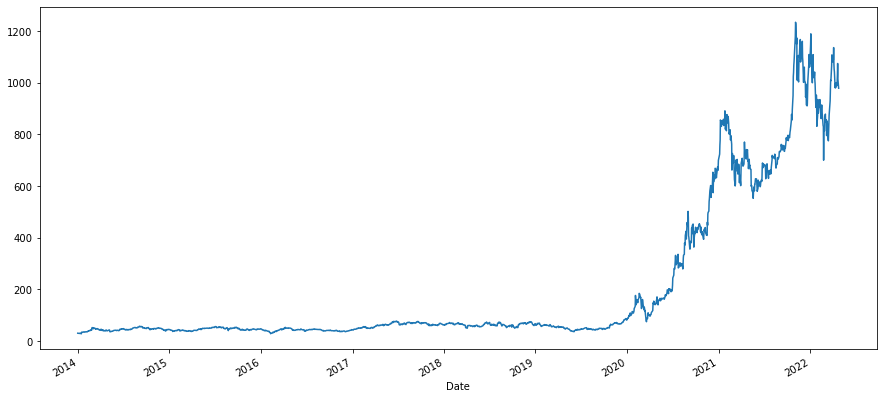

In [ ]:
Acciones_tesla["Open"].plot(label="Tesla", figsize=(15,7))

In [ ]:
Acciones_tesla["TE10"]=Acciones_tesla["Open"].rolling(10).mean()

In [ ]:
Acciones_tesla["TE20"]=Acciones_tesla["Open"].rolling(20).mean()
Acciones_tesla["TE50"]=Acciones_tesla["Open"].rolling(50).mean()
Acciones_tesla["TE100"]=Acciones_tesla["Open"].rolling(100).mean()
Acciones_tesla["TE200"]=Acciones_tesla["Open"].rolling(200).mean()



In [ ]:
Acciones_tesla.tail(3)

,Open,High,Low,Close,Adj Close,Volume,TE10,TE20,TE50,TE100,TE200
Date,,,,,,,,,,,
2022-04-21,1074.729980,1092.219971,996.419983,1008.780029,1008.780029,35138800,1015.283002,1045.484500,933.493600,973.157000,896.18610
2022-04-22,1014.909973,1034.849976,994.000000,1005.049988,1005.049988,23181600,1011.534998,1045.743500,935.091799,972.296199,898.11880
2022-04-25,978.969971,1008.619995,975.299988,998.020020,998.020020,22624780,1005.110999,1044.291998,936.503799,970.642199,899.74775


In [ ]:
Acciones_tesla2=Acciones_tesla.dropna()

In [ ]:
Acciones_tesla2.tail(3)

,Open,High,Low,Close,Adj Close,Volume,TE10,TE20,TE50,TE100,TE200
Date,,,,,,,,,,,
2022-04-21,1074.729980,1092.219971,996.419983,1008.780029,1008.780029,35138800,1015.283002,1045.484500,933.493600,973.157000,896.18610
2022-04-22,1014.909973,1034.849976,994.000000,1005.049988,1005.049988,23181600,1011.534998,1045.743500,935.091799,972.296199,898.11880
2022-04-25,978.969971,1008.619995,975.299988,998.020020,998.020020,22624780,1005.110999,1044.291998,936.503799,970.642199,899.74775


<AxesSubplot:xlabel='Date'>

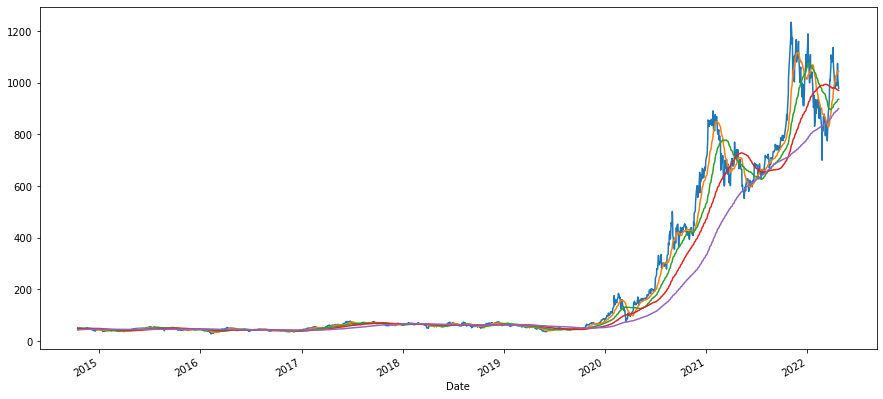

In [ ]:
#vemos una gráfica con esta métrica
Acciones_tesla2["Open"].plot(label="Tesla", figsize=(15,7))
Acciones_tesla2["TE20"].plot()
Acciones_tesla2["TE50"].plot()
Acciones_tesla2["TE100"].plot()
Acciones_tesla2["TE200"].plot()

<AxesSubplot:xlabel='Date'>

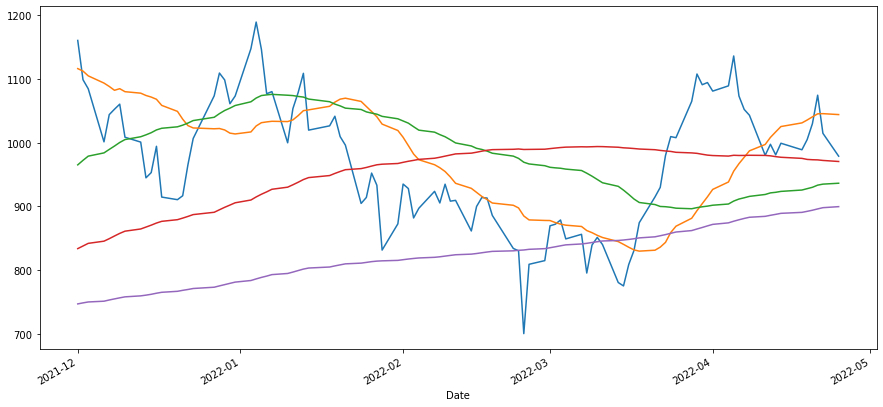

In [ ]:
#vemos una gráfica con esta métrica de los últimos 100 días 

Acciones_tesla2["Open"].iloc[-100:].plot(label="Tesla", figsize=(15,7))
Acciones_tesla2["TE20"].iloc[-100:].plot(label="TE20")
Acciones_tesla2["TE50"].iloc[-100:].plot()
Acciones_tesla2["TE100"].iloc[-100:].plot()
Acciones_tesla2["TE200"].iloc[-100:].plot()


C:\Users\ricca\AppData\Local\Temp/ipykernel_15460/2204304957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Acciones_tesla2["Aumento"]=(Acciones_tesla2["Close"]/Acciones_tesla2["Close"].shift(1)) -1


<AxesSubplot:>

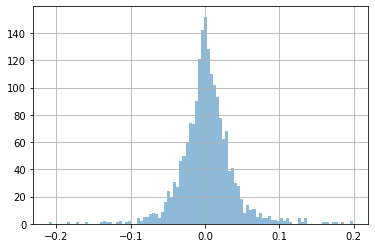

In [ ]:
#veamos ahora una gráfica con la volatilidad de la acción, calulando el incremento porcentual del valor

Acciones_tesla2["Aumento"]=(Acciones_tesla2["Close"]/Acciones_tesla2["Close"].shift(1)) -1

Acciones_tesla2["Aumento"].hist(bins=100, label="Tesla", alpha=0.5)

<AxesSubplot:xlabel='Date'>

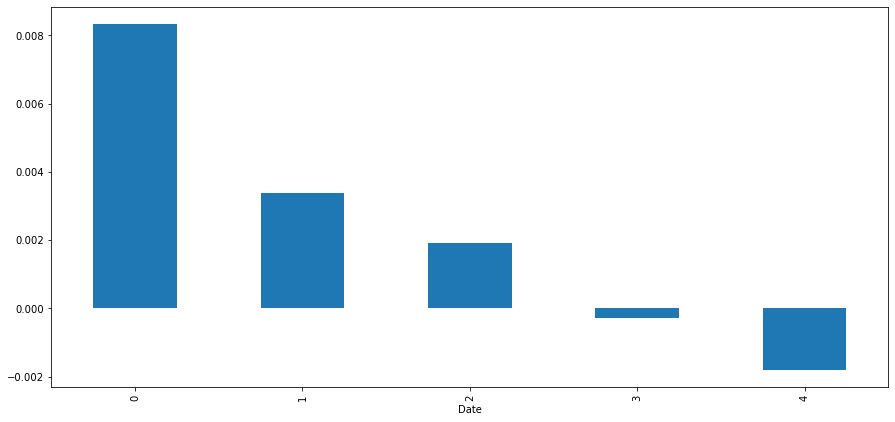

In [ ]:
#vamos a ver en otra gráfica cómo varía el valor por días de la semana 
Acciones_tesla2.Close.pct_change().groupby(Acciones_tesla2.index.dayofweek).mean().plot(kind='bar', figsize=(15,7))

In [ ]:
#vamos a instalar ahora una herramienta de análisis técnico de pandas

!pip install pandas_ta

In [ ]:
import pandas_ta as ta

In [ ]:
 #podemos calcular las medias móviles exponenciales a 20 y 60 días

In [ ]:
Acciones_tesla2['EXP_4'] = ta.ema(Acciones_tesla2['Close'], 4)
Acciones_tesla2['EXP_20'] = ta.ema(Acciones_tesla2['Close'], 20)
Acciones_tesla2['EXP_60'] = ta.ema(Acciones_tesla2['Close'], 60)

C:\Users\ricca\AppData\Local\Temp/ipykernel_15460/2336917539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Acciones_tesla2['EXP_4'] = ta.ema(Acciones_tesla2['Close'], 4)
C:\Users\ricca\AppData\Local\Temp/ipykernel_15460/2336917539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Acciones_tesla2['EXP_20'] = ta.ema(Acciones_tesla2['Close'], 20)
C:\Users\ricca\AppData\Local\Temp/ipykernel_15460/2336917539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [ ]:
Acciones_tesla2.head(2)

,Open,High,Low,Close,Adj Close,Volume,TE10,TE20,TE50,TE100,TE200,Aumento,EXP_4,EXP_20,EXP_60
Date,,,,,,,,,,,,,,,
2014-10-15,44.000,46.198002,43.464001,45.939999,45.939999,45736500,49.494601,49.8131,51.79548,47.99962,44.15114,NaN,NaN,NaN,NaN
2014-10-16,43.944,45.984001,43.820000,45.270000,45.270000,26996500,48.885001,49.3767,51.71876,48.02202,44.21854,-0.014584,NaN,NaN,NaN


In [ ]:
Acciones_tesla3=Acciones_tesla2.dropna()

In [ ]:
Acciones_tesla3.head(2)

NameError: name 'Acciones_tesla3' is not defined

<AxesSubplot:xlabel='Date'>

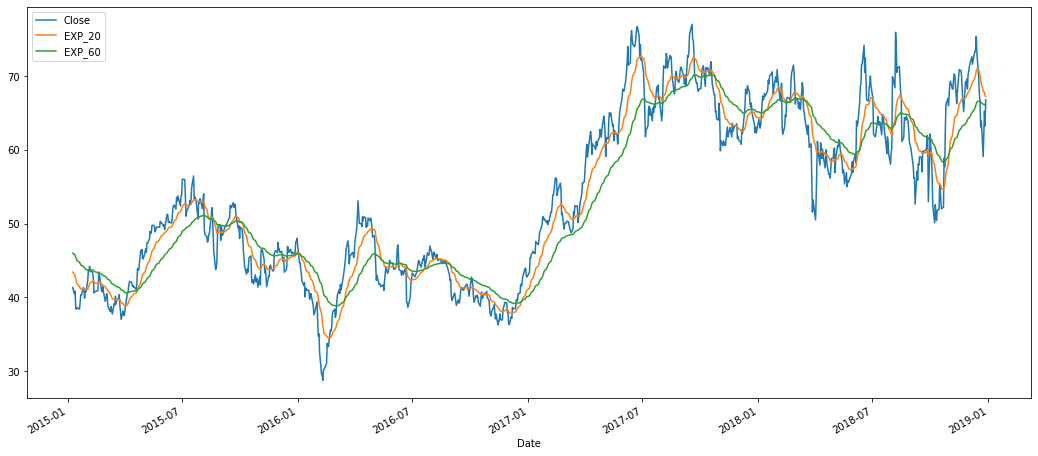

In [ ]:
#vemos una gráfica de los ratios exponenciales para los 1000 primeros días con datos

Acciones_tesla3[['Close','EXP_20','EXP_60']].iloc[:1000].plot(figsize=(18,8))

In [ ]:
#En la gráfica anterior podemos ver que cuando el valor de EXP_20, es decir, la media exponencial a 20 días, supera el valor 
# del EXP 60, es buen momento para comprar, y cuando ocurre lo contrario, es decir, el valor de EXP 20 se coloca por 
# debajo de EXP 60 es buen momento de vender

<AxesSubplot:xlabel='Date'>

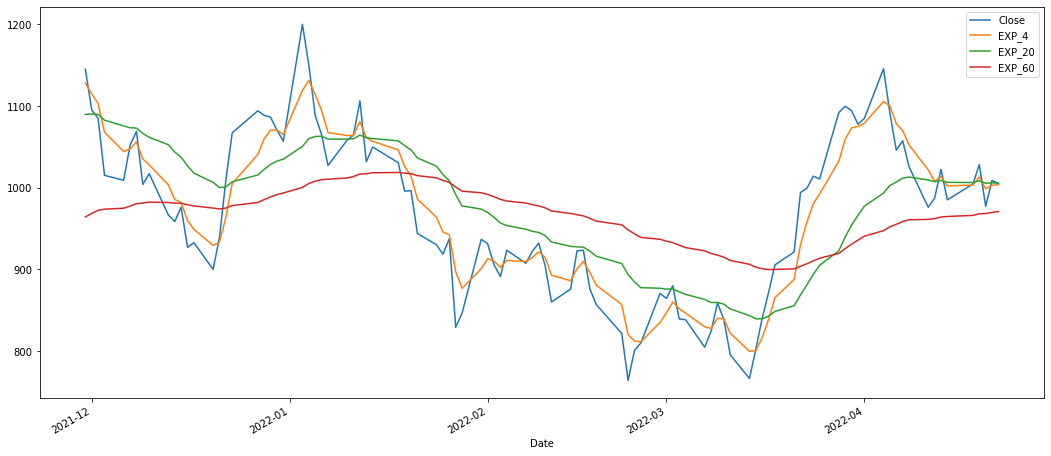

In [ ]:
#veamos los últimos 100 días 
Acciones_tesla3[['Close', "EXP_4",'EXP_20','EXP_60']].iloc[-100:].plot(figsize=(18,8))

In [ ]:
#Se cumple que cuando el EXP 20 se coloca por debajo de EXP 60 era momento de vender y al revés.
#Y más todavía si consideramos EXP 4, cuándo está cruza por arriba a las otras dos, es momento claro de compra y al contrario


In [ ]:
#Calculamos ahora el indicador financiero ATR, average true rage, que mide la volatilidad de una acción en un período 
#de tiempo completo, usamos 7 días

Acciones_tesla3['ATR_7'] = ta.atr(Acciones_tesla3.High, Acciones_tesla3.Low, Acciones_tesla3.Close, n=7)

C:\Users\ricca\AppData\Local\Temp/ipykernel_13548/1694364722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Acciones_tesla3['ATR_7'] = ta.atr(Acciones_tesla3.High, Acciones_tesla3.Low, Acciones_tesla3.Close, n=7)


<AxesSubplot:xlabel='Date'>

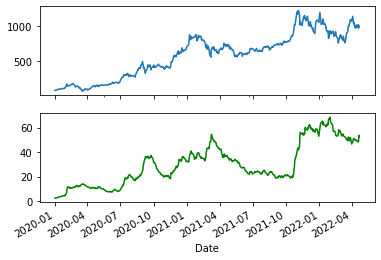

In [ ]:
# Usamos subplot para obtener dos gráficas y hacemos que compartan el eje de X.
ax1 = plt.subplot(211)  
Acciones_tesla3["2020":].Close.plot()
ax1 = plt.subplot(212)
Acciones_tesla3["2020":].ATR_7.plot(c='g', sharex=ax1)

In [ ]:
#Ahora vamos a comparar algunos valores
#introducimos otra columna con la diferencia relativa entre mínimo y máximo del mismo día

Acciones_tesla3["Rango"]=(Acciones_tesla3["High"]-Acciones_tesla3["Low"])/Acciones_tesla3["Low"]

C:\Users\ricca\AppData\Local\Temp/ipykernel_13548/670359567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Acciones_tesla3["Rango"]=(Acciones_tesla3["High"]-Acciones_tesla3["Low"])/Acciones_tesla3["Low"]


In [ ]:
Acciones_tesla3.head(2)

,Open,High,Low,Close,Volume,TE10,TE20,TE50,TE100,TE200,Aumento,EXP_4,EXP_20,EXP_60,ATR_7,Rango
Date,,,,,,,,,,,,,,,,
2015-01-09,41.784000,41.995998,40.992001,41.332001,23341500,43.5610,42.9279,46.00944,48.46064,45.93646,-0.018802,41.992372,43.418000,45.994700,NaN,0.024493
2015-01-12,40.610001,40.894001,39.849998,40.442001,29751500,43.1918,42.8531,45.85712,48.34900,45.92714,-0.021533,41.372224,43.134572,45.812644,NaN,0.026198


In [ ]:
Acciones_tesla3=Acciones_tesla3.drop(columns="Adj Close")


KeyError: "['Adj Close'] not found in axis"

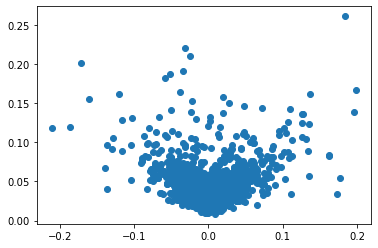

In [ ]:
#Ahora vemos una gráfica con la relación entre el aumento porcentual diario y el rango (mínimo-máximo)

plt.scatter(Acciones_tesla3.Aumento, Acciones_tesla3.Rango)

In [ ]:
#Introducimos otro indicador financiero de intensidad de compra o venta, el RSI a 10 días

Acciones_tesla3["RSI10"]=ta.rsi(close=Acciones_tesla3.Close, length=10)

In [ ]:
Acciones_tesla3.head(2)

,Open,High,Low,Close,Volume,TE10,TE20,TE50,TE100,TE200,Aumento,EXP_4,EXP_20,EXP_60,ATR_7,Rango,RSI10
Date,,,,,,,,,,,,,,,,,
2015-01-09,41.784000,41.995998,40.992001,41.332001,23341500,43.5610,42.9279,46.00944,48.46064,45.93646,-0.018802,41.992372,43.418000,45.994700,NaN,0.024493,NaN
2015-01-12,40.610001,40.894001,39.849998,40.442001,29751500,43.1918,42.8531,45.85712,48.34900,45.92714,-0.021533,41.372224,43.134572,45.812644,NaN,0.026198,NaN


In [ ]:
#Agregamos al conjunto de datos tanto los valores del petroleo Brent como los valores del Botcoin 

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

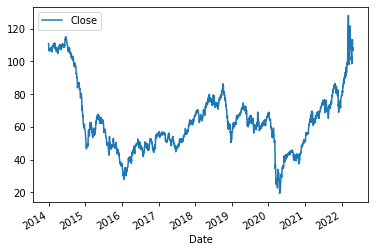

In [ ]:
Cotizacion_brent=yf.download("BZ=F", start, end)

Cotizacion_brent.plot.line(y="Close")

<AxesSubplot:xlabel='Date'>

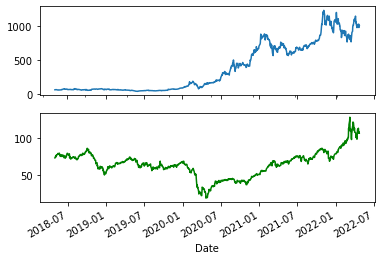

In [ ]:
# Usamos subplot para obtener dos gráficas y hacemos que compartan el eje de X.

ax2 = plt.subplot(211)  
Acciones_tesla3[-1000:].Close.plot()
ax2 = plt.subplot(212)
Cotizacion_brent[-1000:].Close.plot(c='g', sharex=ax2)


In [ ]:
#cambiamos el nombre de la columna Close del Brent para evitar confusiones futuras

Cotizacion_brent=Cotizacion_brent.rename(columns={"Close": "CloseBRENT"})

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

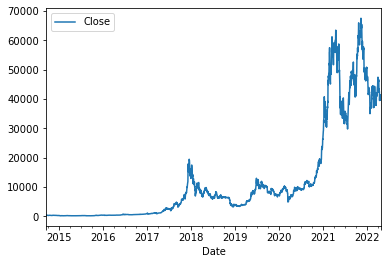

In [ ]:
#intriducimos ahora la cotización de bitcoin 

Cotizacion_btc=yf.download("BTC-USD", start, end)

Cotizacion_btc.plot.line(y="Close")

<AxesSubplot:xlabel='Date'>

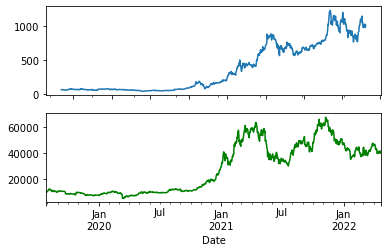

In [ ]:
# Usamos subplot para obtener dos gráficas y hacemos que compartan el eje de X.

ax2 = plt.subplot(211)  
Acciones_tesla3[-1000:].Close.plot()
ax2 = plt.subplot(212)
Cotizacion_btc[-1000:].Close.plot(c='g', sharex=ax2)



In [ ]:
#cambiamos el nombre de la columna Close del Botcoin evitar confusiones futuras

Cotizacion_btc=Cotizacion_btc.rename(columns={"Close": "CloseBTC"})

In [ ]:
#unimos los datos

Acciones_=Acciones_tesla3.join(Cotizacion_brent["CloseBRENT"])

Acciones=Acciones_.join(Cotizacion_btc["CloseBTC"])



In [ ]:
Acciones=Acciones.dropna()

In [ ]:
Acciones.tail(2)

,Open,High,Low,Close,Volume,TE10,TE20,TE50,TE100,TE200,Aumento,EXP_4,EXP_20,EXP_60,ATR_7,Rango,RSI10,CloseBRENT,CloseBTC
Date,,,,,,,,,,,,,,,,,,,
2022-04-21,1074.729980,1092.219971,996.419983,1008.780029,35138800,1015.283002,1045.4845,933.493600,973.157000,896.1861,0.032317,1002.744107,1005.662158,969.603066,53.583962,0.096144,50.313658,108.330002,40527.363281
2022-04-22,1014.909973,1034.849976,994.000000,1005.049988,23181600,1011.534998,1045.7435,935.091799,972.296199,898.1188,-0.003698,1003.666459,1005.603856,970.765260,52.674392,0.041097,49.661314,106.650002,39740.320312


In [ ]:
#vemaos una gráfica de la cotización de Tesla, Brent y Bitcoin 

#Acciones["Close"].plot(label="Tesla", figsize=(15,7))
#Acciones["CloseBRENT"].plot()
#Acciones["CloseBTC"].plot()


In [ ]:
#Ahora vamos a preparar el conjunto de datos para predecir el valor futuro de la cotización.
#Para ello creamos otro conjunto de datos que modificaremos

In [ ]:
datosT=Acciones[["Close", "High", "Open", "Low"]]

datosT=datosT.rename(columns={"Close": "Cierre Real"})
datosT=datosT.rename(columns={"High": "Max Real"})
datosT=datosT.rename(columns={"Open": "Open Real"})
datosT=datosT.rename(columns={"Low": "Low Real"})

#ahora creamos un campo target que sea 1 si la acción ha subido o 0 si ha bajado

datosT["target"]=Acciones.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

In [ ]:
datosT

,Cierre Real,Max Real,Open Real,Low Real,target
Date,,,,,
2015-01-30,40.720001,41.493999,40.792000,40.599998,NaN
2015-02-02,42.188000,42.389999,40.793999,40.660000,1.0
2015-02-03,43.672001,44.074001,42.644001,42.254002,1.0
2015-02-04,43.709999,44.296001,43.658001,43.360001,1.0
2015-02-05,44.198002,45.096001,43.976002,43.928001,1.0
...,...,...,...,...,...
2022-04-18,1004.289978,1014.919983,989.030029,973.409973,1.0
2022-04-19,1028.150024,1034.939941,1005.059998,995.330017,1.0
2022-04-20,977.200012,1034.000000,1030.000000,975.250000,0.0


In [ ]:
# vemps que tenemos los datos hasta el día de hoy
# ahora vamos a modificar los datos para evitar un error común, que consiste en precedir algo usando en el algoritmo ese mismo dato.
# para evitarlo, usamos los datos anteriores para predecir el día posterior

In [ ]:
acciones_previas=Acciones.copy()

acciones_previas=acciones_previas.shift(1)

acciones_previas.head(3)

,Open,High,Low,Close,Volume,TE10,TE20,TE50,TE100,TE200,Aumento,EXP_4,EXP_20,EXP_60,ATR_7,Rango,RSI10,CloseBRENT,CloseBTC
Date,,,,,,,,,,,,,,,,,,,
2015-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-02,40.792000,41.493999,40.599998,40.720001,15035000.0,39.7760,40.5805,43.46164,46.51320,45.72821,-0.007797,40.677139,40.967552,43.765352,1.481591,0.022020,52.779715,52.990002,226.425003
2015-02-03,40.793999,42.389999,40.660000,42.188000,20746000.0,40.0414,40.3915,43.25408,46.35516,45.73518,0.036051,41.281483,41.083785,43.713635,1.508035,0.042548,63.507628,54.750000,238.229004


In [ ]:
#unimos los datos para obtener el conjunto de datos preparado con variables del día anterior y el cierre del día posterior así como 
#el target

AccionesT=datosT.join(acciones_previas)

In [ ]:
AccionesT.tail(5)

,Cierre Real,Max Real,Open Real,Low Real,target,Open,High,Low,Close,Volume,...,TE200,Aumento,EXP_4,EXP_20,EXP_60,ATR_7,Rango,RSI10,CloseBRENT,CloseBTC
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-18,1004.289978,1014.919983,989.030029,973.409973,1.0,999.289978,1012.710022,982.190002,985.000000,19444000.0,...,889.236400,-0.036552,1002.159219,1006.407103,964.632324,49.306997,0.031073,45.814361,111.699997,39935.515625
2022-04-19,1028.150024,1034.939941,1005.059998,995.330017,1.0,989.030029,1014.919983,973.409973,1004.289978,17238400.0,...,890.761951,0.019584,1003.011523,1006.205472,965.932575,48.750069,0.042644,49.297730,113.160004,40826.214844
2022-04-20,977.200012,1034.000000,1030.000000,975.250000,0.0,1005.059998,1034.939941,995.330017,1028.150024,16615900.0,...,892.392351,0.023758,1013.066923,1008.295430,967.972492,48.097202,0.039796,53.413685,107.250000,41502.750000
2022-04-21,1008.780029,1092.219971,1074.729980,996.419983,1.0,1030.000000,1034.000000,975.250000,977.200012,23570400.0,...,894.133801,-0.049555,998.720159,1005.333961,968.275033,48.858116,0.060241,44.787304,106.800003,41374.378906
2022-04-22,1005.049988,1034.849976,1014.909973,994.000000,0.0,1074.729980,1092.219971,996.419983,1008.780029,35138800.0,...,896.186100,0.032317,1002.744107,1005.662158,969.603066,53.583962,0.096144,50.313658,108.330002,40527.363281


In [ ]:
AccionesT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1814 entries, 2015-01-30 to 2022-04-22
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cierre Real  1814 non-null   float64
 1   Max Real     1814 non-null   float64
 2   Open Real    1814 non-null   float64
 3   Low Real     1814 non-null   float64
 4   target       1813 non-null   float64
 5   Open         1813 non-null   float64
 6   High         1813 non-null   float64
 7   Low          1813 non-null   float64
 8   Close        1813 non-null   float64
 9   Volume       1813 non-null   float64
 10  TE10         1813 non-null   float64
 11  TE20         1813 non-null   float64
 12  TE50         1813 non-null   float64
 13  TE100        1813 non-null   float64
 14  TE200        1813 non-null   float64
 15  Aumento      1813 non-null   float64
 16  EXP_4        1813 non-null   float64
 17  EXP_20       1813 non-null   float64
 18  EXP_60       1813 non-null   f

In [ ]:
AccionesT.corr()

,Cierre Real,Max Real,Open Real,Low Real,target,Open,High,Low,Close,Volume,...,TE200,Aumento,EXP_4,EXP_20,EXP_60,ATR_7,Rango,RSI10,CloseBRENT,CloseBTC
Cierre Real,1.000000,0.999613,0.999132,0.999619,0.037928,0.998048,0.998470,0.998553,0.998829,-0.069229,...,0.959567,0.032366,0.998230,0.994063,0.986025,0.943488,0.193457,0.105400,0.479306,0.927607
Max Real,0.999613,1.000000,0.999692,0.999541,0.029530,0.998513,0.999082,0.998967,0.999391,-0.066314,...,0.959431,0.033706,0.998770,0.994699,0.986595,0.945697,0.198108,0.104471,0.479296,0.927305
Open Real,0.999132,0.999692,1.000000,0.999566,0.023316,0.998653,0.999212,0.999272,0.999635,-0.069075,...,0.959748,0.034751,0.998933,0.994760,0.986622,0.944555,0.194058,0.105070,0.479277,0.927890
Low Real,0.999619,0.999541,0.999566,1.000000,0.031128,0.998216,0.998665,0.998980,0.999254,-0.072750,...,0.960526,0.035309,0.998435,0.994084,0.986164,0.941719,0.188416,0.107178,0.480496,0.928391
target,0.037928,0.029530,0.023316,0.031128,1.000000,0.018257,0.017816,0.018225,0.017316,0.004219,...,0.018902,-0.037072,0.018091,0.016768,0.015311,0.009119,-0.014055,0.011894,-0.022149,0.014639
Open,0.998048,0.998513,0.998653,0.998216,0.018257,1.000000,0.999691,0.999564,0.999130,-0.070378,...,0.960210,0.011690,0.999438,0.995697,0.987493,0.946010,0.196256,0.096788,0.479815,0.927993
High,0.998470,0.999082,0.999212,0.998665,0.017816,0.999691,1.000000,0.999540,0.999612,-0.065140,...,0.959893,0.021557,0.999534,0.995689,0.987485,0.947604,0.204214,0.099323,0.479920,0.927572
Low,0.998553,0.998967,0.999272,0.998980,0.018225,0.999564,0.999540,1.000000,0.999618,-0.075598,...,0.960980,0.022016,0.999334,0.995129,0.987064,0.942607,0.184474,0.102703,0.480961,0.928823
Close,0.998829,0.999391,0.999635,0.999254,0.017316,0.999130,0.999612,0.999618,1.000000,-0.069167,...,0.960033,0.033089,0.999364,0.995151,0.986947,0.944925,0.194947,0.104319,0.479917,0.928185
Volume,-0.069229,-0.066314,-0.069075,-0.072750,0.004219,-0.070378,-0.065140,-0.075598,-0.069167,1.000000,...,-0.143114,0.098956,-0.072298,-0.082390,-0.099324,0.010777,0.663389,0.114738,-0.128118,-0.070113


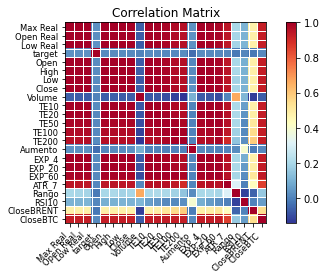

In [ ]:
import statsmodels.api as sm
import seaborn as sns
correlaciones = AccionesT.set_index('Cierre Real').corr()
sm.graphics.plot_corr(correlaciones, xnames=list(correlaciones.columns))
plt.show()


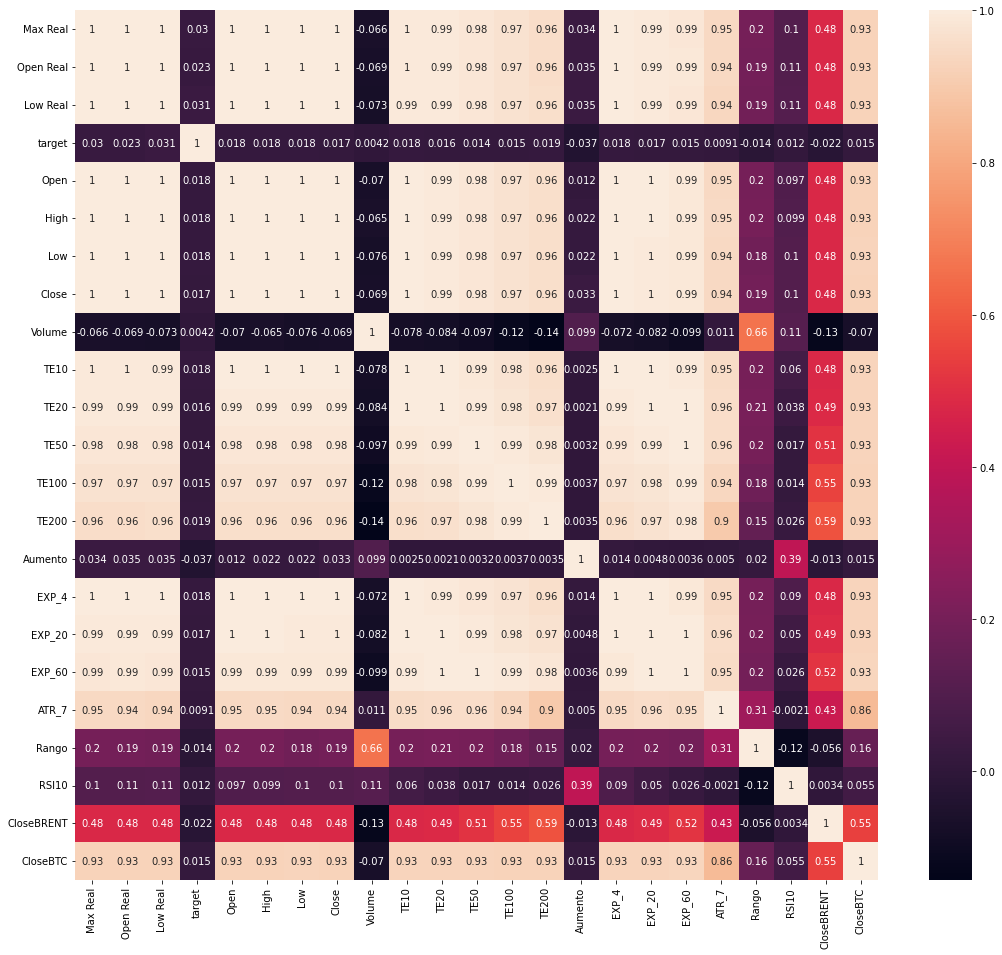

In [ ]:

plt.figure(figsize=(18, 16))
sns.heatmap(correlaciones, annot=True)
plt.show()

In [ ]:
# Modelos predictivos K Nearest Neighbors 

from sklearn.neighbors import KNeighborsClassifier 


In [ ]:
knn=KNeighborsClassifier(n_neighbors=10)

In [ ]:
from sklearn.model_selection import train_test_split

AccionesT=AccionesT.dropna()

In [ ]:
X=AccionesT.drop(["target", "Cierre Real", "Low Real", "Max Real"], axis=1)

X.columns

Index(['Open Real', 'Open', 'High', 'Low', 'Close', 'Volume', 'TE10', 'TE20',
       'TE50', 'TE100', 'TE200', 'Aumento', 'EXP_4', 'EXP_20', 'EXP_60',
       'ATR_7', 'Rango', 'RSI10', 'CloseBRENT', 'CloseBTC'],
      dtype='object')

In [ ]:
y=AccionesT["target"]

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

In [ ]:
print("X_train forma:", X_train.shape)

X_train forma: (1359, 20)


In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred=knn.predict(X_test)

print("puntuacion conjunto test:", format (np.mean(y_pred==y_test)))

knn.score(X_test, y_test)

puntuacion conjunto test: 0.513215859030837


0.513215859030837

In [ ]:
!pip install scikit-learn

In [ ]:
# ahora vamos a importar RandomForest para desarrollar el modelo 

from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1234)

In [ ]:
# vamos primero a entrenar todos los datos excepto los 100 últimos

predictores=['Open Real', 'Open', 'High',
       'Low', 'Close', 'Volume', 'TE10', 'TE20', 'TE50', 'TE100', 'TE200',
       'Aumento', 'EXP_20', 'EXP_60', 'ATR_7', 'Rango', 'RSI10', 'CloseBRENT',
       'CloseBTC']

train=AccionesT.iloc[:-100]
test=AccionesT.iloc[-100:]
model.fit(train[predictores], train["target"])

RandomForestClassifier(min_samples_split=200, random_state=1234)

In [ ]:
#Ahora calculamos la precisión del modelo, esto es, el número de verdaderos positivos dividido entre el 
#total de positivos, verdaderos + falsos
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [ ]:
preds=model.predict(test[predictores])

#lo convertimos en una serie para manejarlo mejor

preds=pd.Series(preds, index=test.index)

In [ ]:
accuracy_score(test["target"], preds)

0.49

In [ ]:
precision_score(test["target"], preds)

0.49

In [ ]:
# Datos Históricos (Backtesting)

start=10
step=10
i=10
predicciones=[]
for i in range(start, AccionesT.shape[0], step):
  train=AccionesT.iloc[0:i].copy()
  test=AccionesT.iloc[i:i+step].copy()
  model.fit(train[predictores], train["target"])
  preds=model.predict_proba(test[predictores])[:,1]
  preds[preds>.6]=1
  preds[preds<.6]=0
  preds=pd.Series(preds, index=test.index)
  combinados=pd.concat({"target": test["target"], "predicciones": preds}, axis=1)
  predicciones.append(combinados)


predicciones=pd.concat(predicciones)

In [ ]:
predicciones["predicciones"].value_counts()

0.0    1634
1.0     159
0.6      10
Name: predicciones, dtype: int64

In [ ]:
precision_score(test["target"], preds)

1.0

In [ ]:
accuracy_score(test["target"], preds)

1.0

In [ ]:
#Modelo de clasificación SVM

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

SyntaxError: invalid syntax (Temp/ipykernel_13548/2629604401.py, line 1)

In [ ]:
# Este resultado es interesante, puesto que garantiza que acertamos un 62,5% de las veces que decidimos comprar acciones


In [ ]:
# Predicción del valor de cierre "Cierre Real" y valor máximo "Max Real", usando modelos de regresion, teniendo todos los demás valores
# dejamos sólo los valores del día anterior y el valor de apertura real

In [ ]:
predictores2=['Open Real', 'Open', 'High',
       'Low', 'Close', 'Volume', 'TE10', 'TE20', 'TE50', 'TE100', 'TE200',
       'Aumento', 'EXP_20', 'EXP_60', 'ATR_7', 'Rango', 'RSI10', 'CloseBRENT',
       'CloseBTC']

X2=AccionesT[predictores2]
y2=AccionesT["Cierre Real"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X2, y2, train_size=0.8,random_state=1234)

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
modelos = ['KNeighborsRegressor()', 'KNeighborsRegressor(n_neighbors=3)', 'KNeighborsRegressor(n_neighbors=6)', 'KNeighborsRegressor(n_neighbors=9)',
           'LinearRegression()', 
           'Ridge()', 'Ridge(0.1)', 'Ridge(0.01)', 'Ridge(10)', 'Ridge(100)',
           'Lasso()', 'Lasso(0.1)', 'Lasso(0.01)', 'Lasso(10)', 'Lasso(100)']
abs_error = []
sqr_error = []
score = []
for mod in modelos:
    modelo = eval(mod)
    modelo.fit(x_train,y_train)
    abs_error.append(metrics.mean_absolute_error(modelo.predict(x_test), y_test))
    sqr_error.append(metrics.mean_squared_error(modelo.predict(x_test), y_test))
    score.append(modelo.score(x_test,y_test))

ajust = pd.DataFrame({'modelos': modelos, 'abs_error': abs_error, 'sqr_error': sqr_error, 'score': score})

C:\Users\ricca\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.07905e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ricca\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.87777e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ricca\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.09151e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ricca\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.04174e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ricca\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAl

In [ ]:
ajust

,modelos,abs_error,sqr_error,score
0,KNeighborsRegressor(),213.403755,89369.090721,-0.018307
1,KNeighborsRegressor(n_neighbors=3),188.302771,83337.985838,0.050413
2,KNeighborsRegressor(n_neighbors=6),222.110873,90940.241406,-0.036210
3,KNeighborsRegressor(n_neighbors=9),237.096825,96271.843296,-0.096960
4,LinearRegression(),5.501934,189.744872,0.997838
5,Ridge(),5.499863,189.680973,0.997839
6,Ridge(0.1),5.500800,189.717693,0.997838
7,Ridge(0.01),5.501562,189.740974,0.997838
8,Ridge(10),5.498976,189.684347,0.997839
9,Ridge(100),5.497568,189.773128,0.997838


In [ ]:
# vemos que el modelo Lasso, con un alfa de 10 es el que mejor ajusta el cierre real, con una puntuación de 0.998721



In [ ]:
#veamos ahora el volumen máximo 

predictores3=['Open Real', 'Open', 'High',
       'Low', 'Close', 'Volume', 'TE10', 'TE20', 'TE50', 'TE100', 'TE200',
       'Aumento', 'EXP_20', 'EXP_60', 'ATR_7', 'Rango', 'RSI10', 'CloseBRENT',
       'CloseBTC']

X3=AccionesT[predictores2]
y3=AccionesT["Max Real"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X2, y3, train_size=0.8,random_state=1234)

In [ ]:
modelos = ['KNeighborsRegressor()', 'KNeighborsRegressor(n_neighbors=3)', 'KNeighborsRegressor(n_neighbors=6)', 'KNeighborsRegressor(n_neighbors=9)',
           'LinearRegression()', 
           'Ridge()', 'Ridge(0.1)', 'Ridge(0.01)', 'Ridge(10)', 'Ridge(100)',
           'Lasso()', 'Lasso(0.1)', 'Lasso(0.01)', 'Lasso(10)', 'Lasso(100)']
abs_error = []
sqr_error = []
score = []
for mod in modelos:
    modelo = eval(mod)
    modelo.fit(x_train,y_train)
    abs_error.append(metrics.mean_absolute_error(modelo.predict(x_test), y_test))
    sqr_error.append(metrics.mean_squared_error(modelo.predict(x_test), y_test))
    score.append(modelo.score(x_test,y_test))

ajust = pd.DataFrame({'modelos': modelos, 'abs_error': abs_error, 'sqr_error': sqr_error, 'score': score})

C:\Users\ricca\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.07905e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ricca\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.87777e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ricca\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.09151e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ricca\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.04174e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ricca\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAl

In [ ]:
ajust

,modelos,abs_error,sqr_error,score
0,KNeighborsRegressor(),218.462382,94308.684027,-0.021526
1,KNeighborsRegressor(n_neighbors=3),192.761990,87847.568440,0.048459
2,KNeighborsRegressor(n_neighbors=6),227.198243,95847.678962,-0.038196
3,KNeighborsRegressor(n_neighbors=9),242.471338,101388.335049,-0.098211
4,LinearRegression(),3.416341,61.199077,0.999337
5,Ridge(),3.403595,61.001257,0.999339
6,Ridge(0.1),3.413232,61.135271,0.999338
7,Ridge(0.01),3.415941,61.190474,0.999337
8,Ridge(10),3.395921,60.923579,0.999340
9,Ridge(100),3.393576,60.856860,0.999341


In [ ]:
# De nuevo, el modelo Lasso 10 se impone, esta vez con puntuación de 0.999367

In [ ]:
#Ahora vamos a ver cómo predice el volumen máximo una regresión lineal que tome solamente el valor de apertura



In [ ]:
predictores4=['Open Real']

X4=AccionesT[predictores4]
y4=AccionesT["Max Real"]

x_train,x_test,y_train,y_test=train_test_split(X4, y4, train_size=0.8,random_state=1234)

In [ ]:
modelos = ['KNeighborsRegressor()', 'KNeighborsRegressor(n_neighbors=3)', 'KNeighborsRegressor(n_neighbors=6)', 'KNeighborsRegressor(n_neighbors=9)',
           'LinearRegression()', 
           'Ridge()', 'Ridge(0.1)', 'Ridge(0.01)', 'Ridge(10)', 'Ridge(100)',
           'Lasso()', 'Lasso(0.1)', 'Lasso(0.01)', 'Lasso(10)', 'Lasso(100)']
abs_error = []
sqr_error = []
score = []
for mod in modelos:
    modelo = eval(mod)
    modelo.fit(x_train,y_train)
    abs_error.append(metrics.mean_absolute_error(modelo.predict(x_test), y_test))
    sqr_error.append(metrics.mean_squared_error(modelo.predict(x_test), y_test))
    score.append(modelo.score(x_test,y_test))

ajust4 = pd.DataFrame({'modelos': modelos, 'abs_error': abs_error, 'sqr_error': sqr_error, 'score': score})

In [ ]:
ajust4

,modelos,abs_error,sqr_error,score
0,KNeighborsRegressor(),3.920900,81.221034,0.999120
1,KNeighborsRegressor(n_neighbors=3),4.209751,95.474091,0.998966
2,KNeighborsRegressor(n_neighbors=6),3.773635,78.072622,0.999154
3,KNeighborsRegressor(n_neighbors=9),3.591624,72.878366,0.999211
4,LinearRegression(),3.423108,61.546423,0.999333
5,Ridge(),3.423108,61.546426,0.999333
6,Ridge(0.1),3.423108,61.546423,0.999333
7,Ridge(0.01),3.423108,61.546423,0.999333
8,Ridge(10),3.423110,61.546449,0.999333
9,Ridge(100),3.423133,61.546679,0.999333
